In [29]:
# Loading libraries
import matplotlib.pyplot as plt
import fastf1 as ff1
import fastf1.plotting

In [30]:
# Caching race weekend data in a created folder
ff1.Cache.enable_cache("cache")


In [31]:
# Enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
ff1.plotting.setup_mpl()

In [33]:
# Load a session and its telemetry data
session = ff1.get_session(2022, 2, 'Q')
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.3]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetchi

In [34]:
# We select the two laps that we want to compare
lec_lap = session.laps.pick_driver("LEC").pick_fastest()
per_lap = session.laps.pick_driver("PER").pick_fastest()

In [35]:
# We get telemetry data for each lap and add distance column
lec_tel = lec_lap.get_car_data().add_distance()
per_tel = per_lap.get_car_data().add_distance()

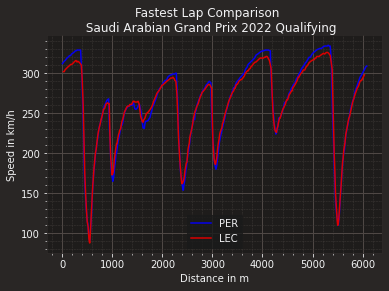

In [38]:
# Plot
fer_color = ff1.plotting.team_color("FER")
rbr_color = ff1.plotting.team_color("RBR")

fig, ax = plt.subplots()
ax.plot(per_tel["Distance"], per_tel["Speed"], color = rbr_color, label = "PER")
ax.plot(lec_tel["Distance"], lec_tel["Speed"], color = fer_color, label = "LEC")


ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.savefig("sa_quali.png", dpi = 200)
plt.show()


